In [2]:
import praw
import json

# Fill in with your Reddit API credentials
reddit = praw.Reddit(
    client_id="BwxnAZWSiHQPWk3mAXye_g",
    client_secret="-F_Do2ng0V7Nomg5aLlRelqjDoGRPA",
    user_agent="layoff-agent by /u/Difficult_Inside1378"
)

def collect_comments(subreddit_name="layoff", limit=500, output_file="layoff_comments.jsonl"):
    subreddit = reddit.subreddit(subreddit_name)
    count = 0

    with open(output_file, "w", encoding="utf-8") as f:
        for comment in subreddit.comments(limit=limit):
            text = comment.body.strip().replace("\n", " ")
            if "[deleted]" in text or "[removed]" in text or len(text.split()) < 5:
                continue

            json_line = {
                "prompt": "A user shared this layoff story:",
                "completion": " " + text
            }
            f.write(json.dumps(json_line, ensure_ascii=False) + "\n")
            count += 1

    print(f"Saved {count} filtered comments to {output_file}")

# Run
if __name__ == "__main__":
    collect_comments(subreddit_name="layoff", limit=1000)

Saved 47 filtered comments to layoff_comments.jsonl


In [8]:
# Load and print each comment
with open("layoff_comments.jsonl", "r", encoding="utf-8") as f:
    for line in f:
        entry = json.loads(line)
        print(entry["completion"])

 What was an issue? I work for the same company and the same union on other branch. It been tremendously slow down for a while. Staff cutting is going on right now. And jobs arent coming in instead going out to other non union facility.
 They actually laid off 200 employees.
 This doesn't necessarily imply that the people being laid off will not have a job. Often the next company who is awarded the same government contract will hire the same staff. There is a shortage of certified behavioral health counselors so they will most likely be hired again.  In these situations the government contractor  is really just a staffing agency that handles only payroll and HR services. If we dive into employee reviews on glass door and indeed we can see that many employees were unsatisfied with the lack of management form this company..
 So it was announced 13 days ago and your point is?
 FWIW, the Battelle layoff was planned because the project was finite and completed its work on site.
 They are la

In [13]:
from textblob import TextBlob

with open("layoff_comments.jsonl", "r", encoding="utf-8") as infile, \
     open("layoff_comments_with_sentiment.csv", "w", newline='', encoding="utf-8") as outfile:
    writer = csv.writer(outfile)
    writer.writerow(["comment", "polarity", "sentiment_label"])

    for line in infile:
        entry = json.loads(line)
        comment = entry["completion"].strip()
        blob = TextBlob(comment)
        polarity = blob.sentiment.polarity
        sentiment_label = (
            "positive" if polarity > 0.1 else
            "negative" if polarity < -0.1 else
            "neutral"
        )
        writer.writerow([comment, polarity, sentiment_label])

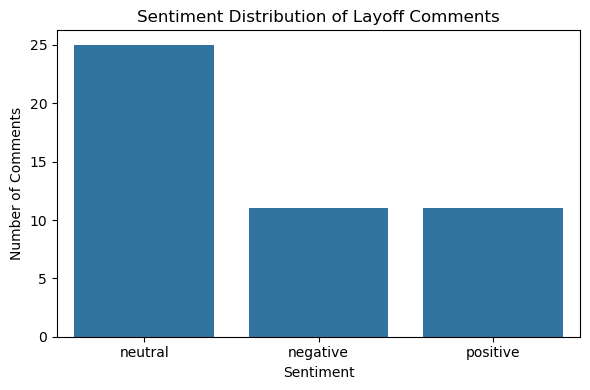

{'neutral': 25, 'negative': 11, 'positive': 11}

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the uploaded CSV file
file_path = "layoff_comments_with_sentiment.csv"
df = pd.read_csv(file_path)

# Clean any rows with missing or malformed data
df = df.dropna(subset=["comment", "polarity", "sentiment_label"])

# Display basic sentiment distribution
sentiment_counts = df["sentiment_label"].value_counts()

# Plot sentiment distribution
plt.figure(figsize=(6, 4))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)
plt.title("Sentiment Distribution of Layoff Comments")
plt.xlabel("Sentiment")
plt.ylabel("Number of Comments")
plt.tight_layout()
plt.show()

# Return sentiment counts summary
sentiment_counts.to_dict()

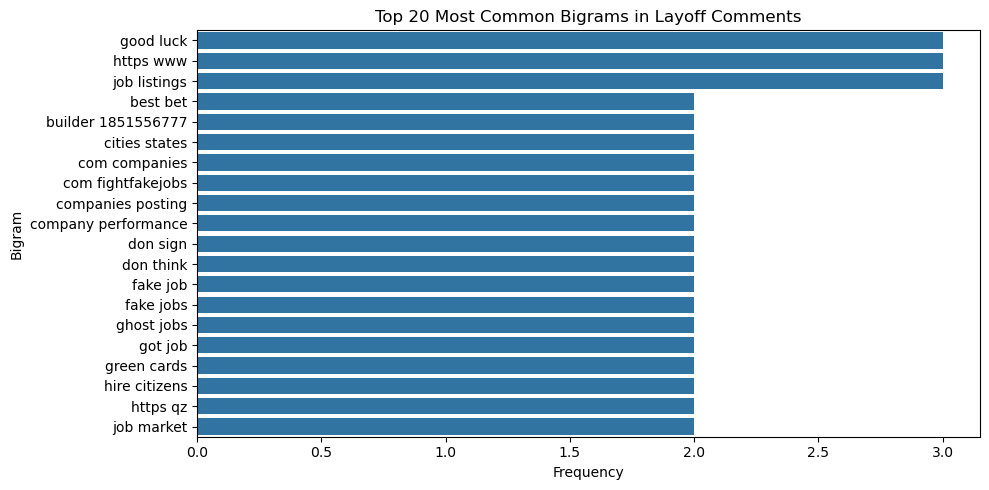

In [62]:
import pandas as pd
import re
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Load data
df = pd.read_csv("layoff_comments_with_sentiment.csv")
df = df.dropna(subset=["comment"])

# Visualize Bigrams
# Use CountVectorizer to extract bigrams
vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words="english")
X_bigram = vectorizer.fit_transform(df["comment"])

# Count bigrams
bigram_freq = X_bigram.sum(axis=0).A1
bigram_names = vectorizer.get_feature_names_out()
bigram_counts = list(zip(bigram_names, bigram_freq))
bigram_counts.sort(key=lambda x: x[1], reverse=True)
top_bigrams = bigram_counts[:20]

# Plot top bigrams
bigram_words, bigram_vals = zip(*top_bigrams)
plt.figure(figsize=(10, 5))
sns.barplot(x=list(bigram_vals), y=list(bigram_words))
plt.title("Top 20 Most Common Bigrams in Layoff Comments")
plt.xlabel("Frequency")
plt.ylabel("Bigram")
plt.tight_layout()
plt.show()

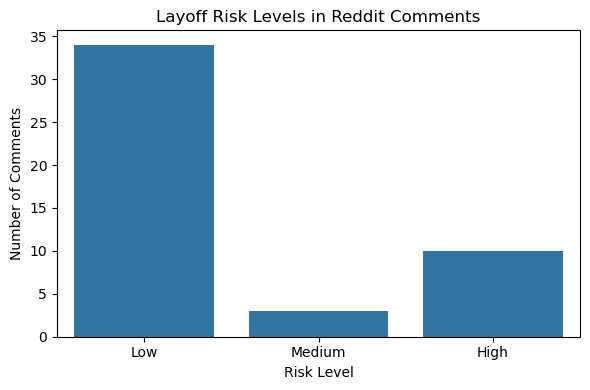

,comment,risk_score,risk_level
0,What was an issue? I work for the same company...,1.0,High
1,They actually laid off 200 employees.,1.0,High
2,This doesn't necessarily imply that the people...,1.0,High
3,So it was announced 13 days ago and your point...,0.0,Low
4,"FWIW, the Battelle layoff was planned because ...",0.0,Low
5,They are laying people off eeeee everywhere. A...,0.0,Low
6,"The not so new clown, Wael Sawan, has been on ...",0.0,Low
7,"Vote for the author of the Art of the Deal, he...",0.0,Low
8,"Well, let me share a little story. Probably n...",0.4,Medium
9,"Yes, I made a word game site, a sudoku site, a...",0.0,Low


In [64]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv("layoff_comments_with_sentiment.csv")
df = df.dropna(subset=["comment", "sentiment_label"])

# Define keywords associated with higher layoff risk
risk_keywords = {
    "reorg": 1.0, "performance": 1.0, "fired": 1.0, "warning": 0.8,
    "budget": 0.8, "cut": 0.8, "terminated": 1.0, "let go": 1.0,
    "laid off": 1.0, "ghosted": 0.6, "fake": 0.7, "hiring freeze": 0.9,
    "company": 0.4, "team": 0.3, "HR": 0.5, "severance": 0.8,
    "mass layoff": 1.0, "job loss": 1.0, "offboarding": 0.7
}

# Function to compute risk score
def compute_risk(comment):
    comment_lower = comment.lower()
    score = 0.0
    for keyword, weight in risk_keywords.items():
        if keyword in comment_lower:
            score += weight
    return min(score, 1.0)  # cap at 1.0

# Apply risk scoring
df["risk_score"] = df["comment"].apply(compute_risk)

# Categorize risk level
def categorize_risk(score):
    if score >= 0.8:
        return "High"
    elif score >= 0.4:
        return "Medium"
    else:
        return "Low"

df["risk_level"] = df["risk_score"].apply(categorize_risk)

# Plot distribution of risk levels
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="risk_level", order=["Low", "Medium", "High"])
plt.title("Layoff Risk Levels in Reddit Comments")
plt.xlabel("Risk Level")
plt.ylabel("Number of Comments")
plt.tight_layout()
plt.show()

# Show first few scored examples
df[["comment", "risk_score", "risk_level"]]

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


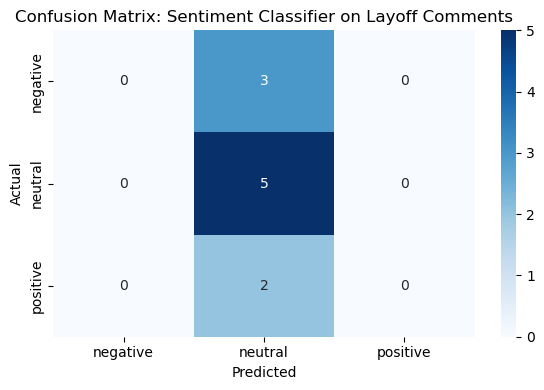

{'0': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 3.0},
 '1': {'precision': 0.5,
  'recall': 1.0,
  'f1-score': 0.6666666666666666,
  'support': 5.0},
 '2': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 2.0},
 'accuracy': 0.5,
 'macro avg': {'precision': 0.16666666666666666,
  'recall': 0.3333333333333333,
  'f1-score': 0.2222222222222222,
  'support': 10.0},
 'weighted avg': {'precision': 0.25,
  'recall': 0.5,
  'f1-score': 0.3333333333333333,
  'support': 10.0}}

In [66]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("layoff_comments_with_sentiment.csv")

# Drop missing values
df = df.dropna(subset=["comment", "sentiment_label"])

# Use only comments and sentiment for modeling
X = df["comment"]
y = df["sentiment_label"]

# Encode labels
y = y.map({"negative": 0, "neutral": 1, "positive": 2})

# TF-IDF vectorization
vectorizer = TfidfVectorizer(stop_words="english", max_features=1000)
X_vec = vectorizer.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.2, random_state=42)

# Train logistic regression classifier
clf = LogisticRegression(max_iter=200)
clf.fit(X_train, y_train)

# Predict
y_pred = clf.predict(X_test)

# Evaluation
report = classification_report(y_test, y_pred, output_dict=True)
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=["negative", "neutral", "positive"],
            yticklabels=["negative", "neutral", "positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix: Sentiment Classifier on Layoff Comments")
plt.tight_layout()
plt.show()

# Return classification report
report